<a href="https://colab.research.google.com/github/carbotton/ML_Notebooks/blob/main/supervised_learning/heart_desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

https://archive.ics.uci.edu/dataset/45/heart+disease

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

Has missing values in some columns.

# Columnas

age (edad, en años)

sex (sexo: 1 = masculino, 0 = femenino)

cp (tipo de dolor en el pecho: 1–4)

trestbps (presión arterial en reposo, en mm Hg)

chol (colesterol sérico, en mg/dl)

fbs (azúcar en sangre en ayunas > 120 mg/dl: 1 = verdadero, 0 = falso)

restecg (resultados electrocardiográficos en reposo: 0–2)

thalach (frecuencia cardíaca máxima lograda)

exang (angina inducida por el ejercicio: 1 = sí, 0 = no)

oldpeak (depresión del ST inducida por el ejercicio)

slope (pendiente de la sección ST en ejercicio)

ca (número de vasos principales coloreados por fluoroscopia: 0–3)

thal (anomalía de ácidos biliares: 3 = normal; 6 = defecto fijo; 7 = defecto reversible)

num (diagnóstico de enfermedad cardíaca: 0 = sin registro de enfermedad; 1,2,3,4 = presencia de enfermedad con diferentes grados)

# Ejercicio

## Objetivo
Entrenar modelo supervisado que prediga target = 0 o 1 indicando ausencia o presencia de enfermedad cardiaca.

La columna num la convertimos en binaria:

0 -> "sin enfermedad cardiaca"

1,2,3,4 -> "con enfermedad cardiaca"


# Preparacion de los datos

In [2]:
import pandas as pd

# Descargar el CSV y guardarlo como 'heart.csv' en la misma carpeta que el notebook
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columnas = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]
df = pd.read_csv(url, header=None, names=columnas)


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
print(f"Dataframe axes: {df.axes}\n")
print(f"Dataframe columns: {df.columns}\n")
print(f"Dataframe types:\n {df.dtypes}\n")
print(f"Dataframe shape: {df.shape}\n")
print(f"Dataframe size: {df.size}\n")

Dataframe axes: [RangeIndex(start=0, stop=303, step=1), Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')]

Dataframe columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Dataframe types:
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

Dataframe shape: (303, 14)

Dataframe size: 4242



In [5]:
# all rows float64 but ca, thal and num

# convert num to binary and rename column to "target"
df["target"] = df["num"].apply(lambda x: 0 if x == 0 else 1)
df.drop("num", axis=1, inplace=True)

In [6]:
print(df["ca"])  # tiene valores que son ?
print(df["thal"])

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object
0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: object


In [7]:
for col in columnas:
  print(f"Valores columna {col}: {df[col].unique()}")

Valores columna age: [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
Valores columna sex: [1. 0.]
Valores columna cp: [1. 4. 3. 2.]
Valores columna trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
Valores columna chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341

KeyError: 'num'

Valores columna ca: ['0.0' '3.0' '2.0' '1.0' '?']
Valores columna thal: ['6.0' '3.0' '7.0' '?']

Hay que sacar los ?

Pruebo eliminar la fila entera si contiene un ?

In [8]:
mask = (df["ca"] != "?") & (df["thal"] != "?")
df_filtrado = df[mask]

print(df_filtrado["ca"])
print(df_filtrado["thal"])

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
297    0.0
298    0.0
299    2.0
300    1.0
301    1.0
Name: ca, Length: 297, dtype: object
0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
297    7.0
298    7.0
299    7.0
300    7.0
301    3.0
Name: thal, Length: 297, dtype: object


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
# Binary classification -> first try: logistic regression
# https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

X = df.loc[:, df.columns != "target"]
y = df["target"]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (303, 13)
y shape: (303,)


# Logistic Regression

In [18]:
# age [0,100], sex {0,1}, cp chest pain {1,2,3,4}, thalach (70, 200)....

# Feature scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

col_cont = ["age", "trestbps", "chol", "thalach", "oldpeak"]  # continuous values
col_cat = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]  # categorical values

preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",                      # Nombre del transformador
            StandardScaler(),           # Escalador para columnas continuas
            col_cont
        ),
        (
            "cat",                      # Nombre del segundo transformador
            OneHotEncoder(drop="first", sparse_output=False),  # Codificación de categóricas; sparse_output=True solo almacena posiciones y valores distintos de 0.
            col_cat
        )
    ],
    remainder="drop"  # Elimina cualquier otra columna no listada
)

# Compete pipeline: preprocessing + Logistic Regression
pipe = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", LogisticRegression(
        penalty="l2",
        solver="liblinear",
        C=1.0,
        random_state=42,
        max_iter=1000
    ))
])

In [19]:
from sklearn.model_selection import train_test_split

# 20% test, 80% train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nConjunto de entrenamiento:", X_train.shape,
      "Conjunto de prueba:", X_test.shape)

# con/sin stratify: Conjunto de entrenamiento: (242, 13) Conjunto de prueba: (61, 13)



Conjunto de entrenamiento: (242, 13) Conjunto de prueba: (61, 13)


In [20]:
# Train pipeline
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

In [49]:
# Metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc_test_lr = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc_test_lr:.4f}\n")

print("Reporte de clasificación (Logistic Regression):")
class_report_lr = classification_report(y_test, y_pred)
print(class_report_lr)

print("Matriz de confusión:")
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print(conf_matrix_lr)

# TP  FP
# FN  TN

# precision: ratio of TP to (TP + FP) -> measures how many of the samples labeled as X are actually X
# recall/sensitivity: capacidad del modelo para encontrar todos los casos positivos. Ratio of TP to (TP + FN)
# f1-score: combina precision y recall. Penalizes extreme values of either precision or recall
# support: number of actual occurrences of each class in the test set. Example: support 33 for class 0 means 33 true examples out of the 61 total examples
# accuracy: overall proportion of correct predictions (TP + TN) among all test samples
# macro avg: unweighted average of a given metric. Example macro precision = (precion0+precision1)/2
# weighted avg: same as macro but weighted by each classes' support  w_precision = (sup0*precion0+sup1*precision1)/(sup0+sup1)

Accuracy en test: 0.8689

Reporte de clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Matriz de confusión:
[[28  5]
 [ 3 25]]


In [23]:
# Cross validation

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(
    n_splits=5,       # Número de folds
    shuffle=True,     # Barajar antes de particionar
    random_state=42   # Para reproducibilidad
)

scores_accuracy = cross_val_score(
    estimator=pipe,
    X=X,
    y=y,
    scoring="accuracy",  # Métrica a calcular
    cv=skf,
    n_jobs=-1            # Usar todos los núcleos de CPU disponibles
)

print("Accuracy por fold:", scores_accuracy)
print(f"Accuracy promedio: {scores_accuracy.mean():.4f}")
print(f"Desviación estándar: {scores_accuracy.std():.4f}\n")

resultados = cross_validate(
    estimator=pipe,
    X=X,
    y=y,
    scoring=["accuracy", "precision", "recall", "f1"],  # Lista de métricas
    cv=skf,
    n_jobs=-1,
    return_train_score=False  # No necesitamos métricas de entrenamiento
)

for metrica in ["test_accuracy", "test_precision", "test_recall", "test_f1"]:
    valores = resultados[metrica]
    nombre_metrica = metrica.replace("test_", "")
    print(f"{nombre_metrica.capitalize()} por fold: {valores}")
    print(f"{nombre_metrica.capitalize()} promedio: {valores.mean():.4f}")
    print(f"{nombre_metrica.capitalize()} std: {valores.std():.4f}\n")

Accuracy por fold: [0.90163934 0.80327869 0.80327869 0.78333333 0.88333333]
Accuracy promedio: 0.8350
Desviación estándar: 0.0479

Accuracy por fold: [0.90163934 0.80327869 0.80327869 0.78333333 0.88333333]
Accuracy promedio: 0.8350
Accuracy std: 0.0479

Precision por fold: [0.89285714 0.78571429 0.78571429 0.79166667 0.95652174]
Precision promedio: 0.8425
Precision std: 0.0701

Recall por fold: [0.89285714 0.78571429 0.78571429 0.7037037  0.78571429]
Recall promedio: 0.7907
Recall std: 0.0601

F1 por fold: [0.89285714 0.78571429 0.78571429 0.74509804 0.8627451 ]
F1 promedio: 0.8144
F1 std: 0.0547



# Plots

<ipython-input-25-1af35f767f77>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ages_negative, ages_positive], labels=["Negative (0)", "Positive (1)"])


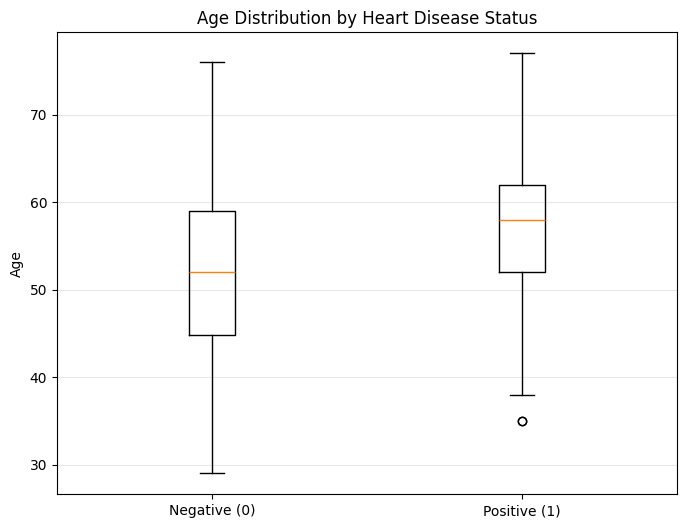

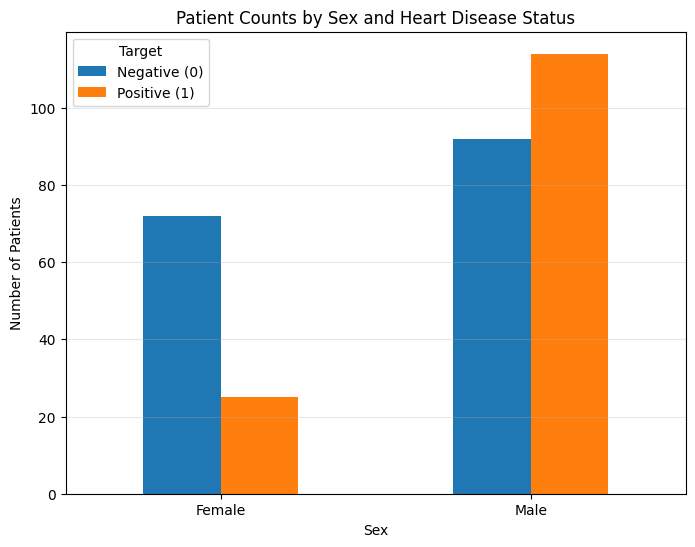

In [25]:
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------------------------------------------
# (1) Boxplot: Age distribution grouped by target (0 = negative, 1 = positive)
# ----------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(8, 6))

# Prepare two series: ages of negative patients, ages of positive patients
ages_negative = df[df["target"] == 0]["age"]
ages_positive = df[df["target"] == 1]["age"]

# Draw boxplot: left box is ages_negative, right box is ages_positive
plt.boxplot([ages_negative, ages_positive], labels=["Negative (0)", "Positive (1)"])
plt.title("Age Distribution by Heart Disease Status")
plt.ylabel("Age")
plt.grid(axis="y", alpha=0.3)
plt.show()


# ----------------------------------------------------------------------------------------------------------------
# (2) Bar chart: Count of patients by sex (Male/Female) and target (0 vs. 1)
# ----------------------------------------------------------------------------------------------------------------

# Map the numeric 'sex' column to labels
df["sex_label"] = df["sex"].map({0: "Female", 1: "Male"})

# Group by sex_label and target, then count how many rows in each group
counts = df.groupby(["sex_label", "target"]).size().unstack(fill_value=0)

# Draw a grouped bar chart: one group per sex, two bars for each (target=0 and target=1)
counts.plot(kind="bar", figsize=(8, 6))
plt.title("Patient Counts by Sex and Heart Disease Status")
plt.xlabel("Sex")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.legend(title="Target", labels=["Negative (0)", "Positive (1)"])
plt.grid(axis="y", alpha=0.3)
plt.show()


# KNN

K-nearest neighbors

n_neighbors:
- n pequeño: puede ajustarse demasiado al ruido
- n grande: suaviza frontera de desicion, reduce varianza pero aumenta sesgo
- 5 es un valor comun por defecto



In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Update the pipeline to use KNeighborsClassifier
pipe_knn = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])

# Train the KNN pipeline
pipe_knn.fit(X_train, y_train)

# Predict
y_pred_knn = pipe_knn.predict(X_test)

# Metrics for KNN
acc_test_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy en test (KNN): {acc_test_knn:.4f}\n")

print("Reporte de clasificación (KNN):")
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)

print("Matriz de confusión (KNN):")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matrix_knn)

# Cross validation for KNN
scores_accuracy_knn = cross_val_score(
    estimator=pipe_knn,
    X=X,
    y=y,
    scoring="accuracy",
    cv=skf,
    n_jobs=-1
)

print("\nAccuracy por fold (KNN):", scores_accuracy_knn)
print(f"Accuracy promedio (KNN): {scores_accuracy_knn.mean():.4f}")
print(f"Desviación estándar (KNN): {scores_accuracy_knn.std():.4f}\n")

resultados_knn = cross_validate(
    estimator=pipe_knn,
    X=X,
    y=y,
    scoring=["accuracy", "precision", "recall", "f1"],
    cv=skf,
    n_jobs=-1,
    return_train_score=False
)

print("Cross-validation results (KNN):")
for metrica in ["test_accuracy", "test_precision", "test_recall", "test_f1"]:
    valores = resultados_knn[metrica]
    nombre_metrica = metrica.replace("test_", "")
    print(f"{nombre_metrica.capitalize()} por fold (KNN): {valores}")
    print(f"{nombre_metrica.capitalize()} promedio (KNN): {valores.mean():.4f}")
    print(f"{nombre_metrica.capitalize()} std (KNN): {valores.std():.4f}\n")

Accuracy en test (KNN): 0.9344

Reporte de clasificación (KNN):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.90      0.96      0.93        28

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

Matriz de confusión (KNN):
[[30  3]
 [ 1 27]]

Accuracy por fold (KNN): [0.83606557 0.80327869 0.7704918  0.83333333 0.83333333]
Accuracy promedio (KNN): 0.8153
Desviación estándar (KNN): 0.0254

Cross-validation results (KNN):
Accuracy por fold (KNN): [0.83606557 0.80327869 0.7704918  0.83333333 0.83333333]
Accuracy promedio (KNN): 0.8153
Accuracy std (KNN): 0.0254

Precision por fold (KNN): [0.82142857 0.80769231 0.75       0.81481481 0.84615385]
Precision promedio (KNN): 0.8080
Precision std (KNN): 0.0318

Recall por fold (KNN): [0.82142857 0.75       0.75       0.81481481 0.78571429]
Recall promedi

# XGBoost

Sequential ensamble of decision trees.
Each new tree adjusts the errors of the previous model using gradient descent.

### learning_rate
Multiplica la contribucion de cada arbol nuevo antes de sumarlo al modelo acumulado.

Rango habitual entre 0.01 y 0.3.

Valores bajos hacen que cada arbol corrija poco entonces ahi se precisa maor n_estimators para converger.

Valores altos aceleran el ajuste pero nos arriesgamos a overfitting.

In [46]:
!pip install xgboost

import xgboost as xgb

# Update the pipeline to use XGBoost Classifier
pipe_xgb = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", xgb.XGBClassifier(
        objective="binary:logistic",  # For binary classification
        eval_metric="logloss",       # Evaluation metric
        use_label_encoder=False,     # To avoid deprecation warning
        n_estimators=100,            # Number of boosting rounds
        learning_rate=0.1,           # Step size shrinkage
        max_depth=3,                 # Maximum depth of trees
        random_state=42
    ))
])

# Train the XGBoost pipeline
pipe_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = pipe_xgb.predict(X_test)

# Metrics for XGBoost
acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy en test (XGBoost): {acc_xgb:.4f}\n")

print("Reporte de clasificación (XGBoost):")
class_report_xgb = classification_report(y_test, y_pred_xgb)
print(class_report_xgb)

print("Matriz de confusión (XGBoost):")
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix_xgb)


Accuracy en test (XGBoost): 0.8689

Reporte de clasificación (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Matriz de confusión (XGBoost):
[[28  5]
 [ 3 25]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Update the pipeline to use RandomForestClassifier
pipe_rf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        random_state=42,
        max_depth=10 # Added a max_depth similar to the last XGBoost test
    ))
])

# Train the Random Forest pipeline
pipe_rf.fit(X_train, y_train)

# Predict
y_pred_rf = pipe_rf.predict(X_test)

# Metrics for Random Forest
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en test (Random Forest): {acc_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)

print("Matriz de confusión (Random Forest):")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

Accuracy en test (Random Forest): 0.8852

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Matriz de confusión (Random Forest):
[[28  5]
 [ 2 26]]


# Conculsiones

Random forest fue el de accuracy mas alto, al rededor de 0.88

XGBoost y Logistic Regression dieron accuracy simialres, al rededor de 0.86

In [52]:
print("========== RESULTADOS ==========\n\n")
print("LOGISTIC REGRESSION")
print("_____________________\n")
print(f"Accuracy en test: {acc_test_lr:.4f}\n")
print("Reporte de clasificación (Logistic Regression):")
print(class_report_lr)
print("Matriz de confusión:")
print(conf_matrix_lr)
print("\n\nKNN")
print("_____________________\n")
print(f"Accuracy en test (KNN): {acc_test_knn:.4f}\n")
print("Reporte de clasificación (KNN):")
print(class_report_knn)
print("Matriz de confusión (KNN):")
print(conf_matrix_knn)
print("\n\nXGBoost")
print("_____________________\n")
print(f"Accuracy en test (XGBoost): {acc_test_xgb:.4f}\n")
print("Reporte de clasificación (XGBoost):")
print(class_report_xgb)
print("Matriz de confusión (XGBoost):")
print(conf_matrix_xgb)
print("\n\nRANDOM FOREST")
print("_____________________\n")
print(f"Accuracy en test (Random Forest): {acc_test_rf:.4f}\n")
print("Reporte de clasificación (Random Forest):")
print(class_report_rf)
print("Matriz de confusión (Random Forest):")
print(conf_matrix_rf)

========== RESULTADOS ==========


LOGISTIC REGRESSION
_____________________

Accuracy en test: 0.8689

Reporte de clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Matriz de confusión:
[[28  5]
 [ 3 25]]


KNN
_____________________

Accuracy en test (KNN): 0.9344

Reporte de clasificación (KNN):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.90      0.96      0.93        28

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

Matriz de confusión (KNN):
[[30  3]
 [ 1 27]]


XGBoost
_____